In [2]:
pip install fastf1 pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.


core           INFO 	Loading data for Hungarian Grand Prix - Race [v3.6.0]
INFO:fastf1.fastf1.core:Loading data for Hungarian Grand Prix - Race [v3.6.0]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_stat

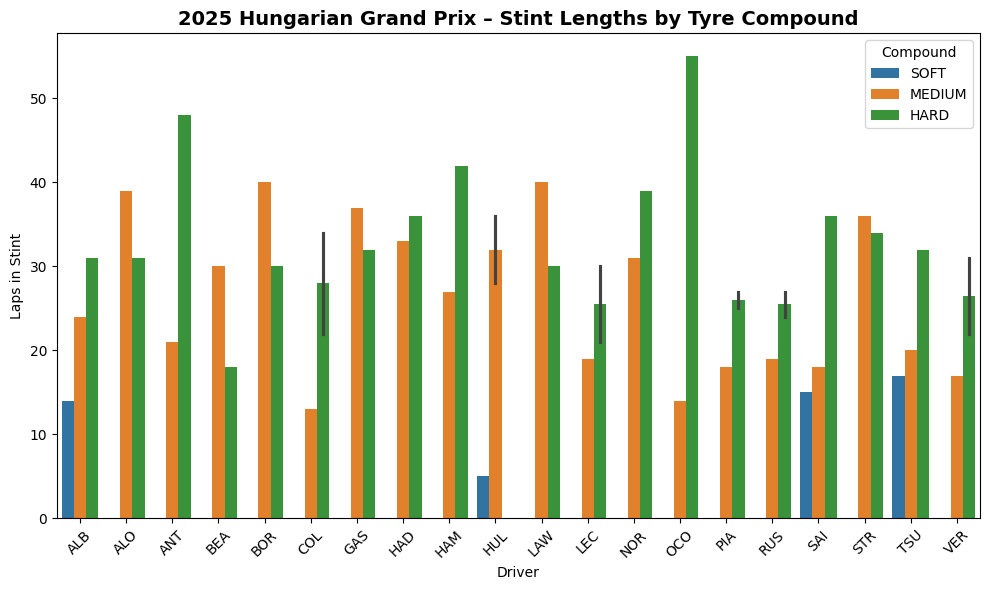

In [4]:
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create the cache directory if it doesn't exist
if not os.path.exists('cache'):
    os.makedirs('cache')

fastf1.Cache.enable_cache('cache')

year = 2025

gp_name = 'Hungarian Grand Prix'

session = fastf1.get_session(year, gp_name, 'R')

session.load()

laps = session.laps

stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
)['LapNumber'].count().reset_index()

stints.rename(columns={'LapNumber': 'StintLength'}, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=stints, x='Driver', y='StintLength', hue='Compound', dodge=True)
plt.title(f'{year} {gp_name} – Stint Lengths by Tyre Compound', fontsize=14, fontweight='bold')
plt.ylabel('Laps in Stint')
plt.xlabel('Driver')
plt.legend(title='Compound')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()